Imports

In [61]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Load data

In [62]:
data = pd.read_csv('MNIST/train.csv')

Displaying data

In [63]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting the data

In [64]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

vld_data = data[0:1000].T
Y_vld = vld_data[0]
X_vld = vld_data[1:n] / 255

trn_data = data[1000:m].T
Y_trn = trn_data[0]
X_trn = trn_data[1:n] / 255

Setting up the neural network

In [65]:
def init_params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

Activation functions

In [66]:
def ReLU(Z):
  return np.maximum(0, Z)

In [67]:
def softmax(Z):
  return np.exp(Z) / sum(np.exp(Z))

Forward propogation

In [68]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1, A1, Z2, A2

One hot encoder

In [69]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

Back propogation

In [70]:
def deriv_ReLU(Z):
  return Z > 0

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)
  return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, step):
  W1 = W1 - step * dW1
  b1 = b1 - step * db1
  W2 = W2 - step * dW2
  b2 = b2 - step * db2
  return W1, b1, W2, b2

Gradient descent

In [71]:
def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, epochs, step):
  W1, b1, W2, b2 = init_params()
  for i in range(epochs):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, step)
    if i % 25 == 0:
      accuracy = get_accuracy(get_predictions(A2), Y) * 100
      print(f"Epoch {i}:\t Accuracy: {accuracy}%")
  return W1, b1, W2, b2

Training the model

In [72]:
W1, b1, W2, b2 = gradient_descent(X_trn, Y_trn, 500, 0.1)

Epoch 0:	 Accuracy: 12.975609756097562%
Epoch 25:	 Accuracy: 40.25609756097561%
Epoch 50:	 Accuracy: 53.65121951219513%
Epoch 75:	 Accuracy: 62.84146341463415%
Epoch 100:	 Accuracy: 68.21707317073171%
Epoch 125:	 Accuracy: 71.79512195121951%
Epoch 150:	 Accuracy: 74.37073170731708%
Epoch 175:	 Accuracy: 76.42682926829268%
Epoch 200:	 Accuracy: 78.10487804878049%
Epoch 225:	 Accuracy: 79.35609756097561%
Epoch 250:	 Accuracy: 80.49024390243903%
Epoch 275:	 Accuracy: 81.4341463414634%
Epoch 300:	 Accuracy: 82.18536585365854%
Epoch 325:	 Accuracy: 82.82195121951219%
Epoch 350:	 Accuracy: 83.40487804878049%
Epoch 375:	 Accuracy: 83.9780487804878%
Epoch 400:	 Accuracy: 84.46585365853659%
Epoch 425:	 Accuracy: 84.8780487804878%
Epoch 450:	 Accuracy: 85.22195121951219%
Epoch 475:	 Accuracy: 85.56341463414634%


Testing the model

Index: 208


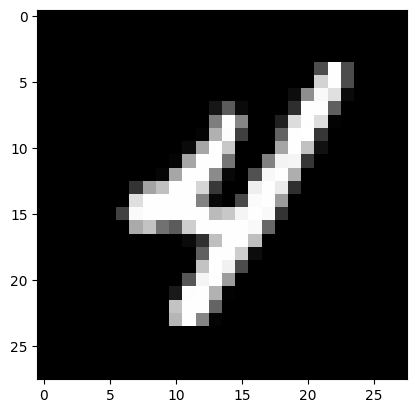

Prediction: 4, Confidence: 94.76853477973553%


In [162]:
def test_model():
    rand_index = np.random.choice(Y_vld.shape[0])
    x = X_vld[:, rand_index].reshape(-1,1)
    y = Y_vld[rand_index]
    _,_,_,a = forward_prop(W1,b1,W2,b2,x)
    prediction = a.argmax()
    confidence = a[prediction]
    print("Index:", rand_index)
    plt.gray()
    plt.imshow(x.reshape(28,28), interpolation='nearest')
    plt.show()
    print(f"Prediction: {y}, Confidence: {confidence[0] * 100}%")

test_model()